In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 

In [3]:
Fs, aud = wavfile.read('C:\\Users\\jlvdo\\Desktop\\gm1_01_065_affirm.wav')

In [4]:
Fs, aud = wavfile.read('C:\\Users\\jlvdo\\Desktop\\gm1_02_032_alitalia_squawk.wav')

In [5]:
print('Sampling Frequency:', Fs, ' Hz')
print('Duration of Audio :', len(aud)/Fs, 's')
print('Audio Array       :', aud)

if aud.ndim == 2:
    print('Type of Audio     : Stereo, taking only the left channel')
    aud = aud[:,0]
elif aud.ndim == 1:
    print('Type of Audio     : Mono')

Sampling Frequency: 32000  Hz
Duration of Audio : 3.499625 s
Audio Array       : [-484 -477 -530 ...  196 -364 -512]
Type of Audio     : Mono


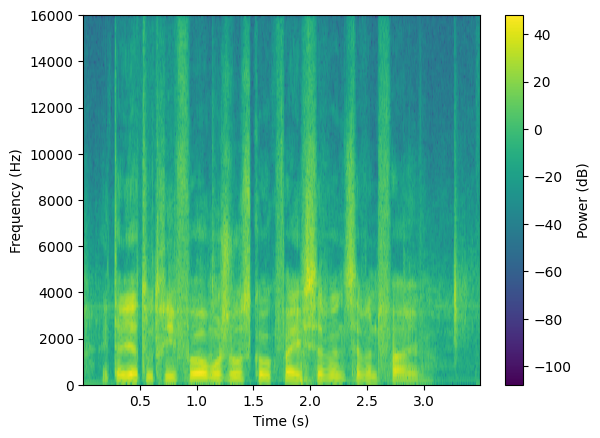

In [6]:
fig = plt.figure()
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs, scale='dB')
plt.yscale('linear')

plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar().set_label('Power (dB)')
plt.show()

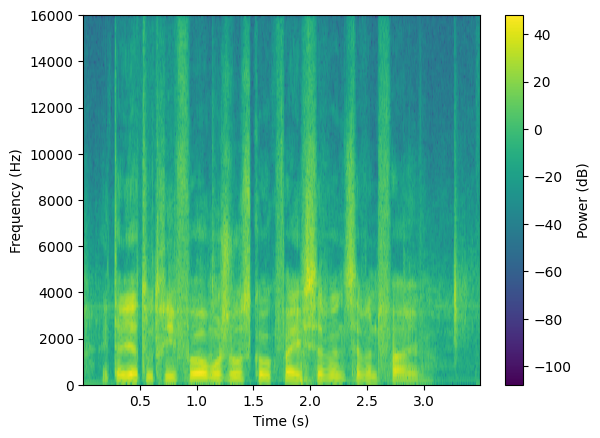

In [7]:
fig

In [8]:
fig.savefig('spectrogram_alitalia.pdf', format='pdf', bbox_inches='tight')
fig.savefig('spectrogram_alitalia.svg', format='svg', bbox_inches='tight')

In [9]:
import whisper
model = whisper.load_model('large-v2')

c:\Users\jlvdo\miniconda3\envs\whisper\Lib\site-packages\whisper\timing.py:57: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit
c:\Users\jlvdo\miniconda3\envs\whisper\Lib\site-packages\whisper\transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 Etalia234 bonjour, SCO 5775


In [11]:
trs = model.transcribe('C:\\Users\\jlvdo\\Desktop\\gm1_02_032_alitalia_squawk.wav', word_timestamps=True, initial_prompt='alitalia two three four bonjour squawk five seven seven five')

c:\Users\jlvdo\miniconda3\envs\whisper\Lib\site-packages\whisper\transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 italia two three four bonjour squawk five seven seven five
{'text': ' italia two three four bonjour squawk five seven seven five', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 2.92, 'text': ' italia two three four bonjour squawk five seven seven five', 'tokens': [50364, 22366, 654, 732, 1045, 1451, 4428, 8696, 2339, 31451, 1732, 3407, 3407, 1732, 50540], 'temperature': 0.0, 'avg_logprob': -0.4691300690174103, 'compression_ratio': 1.0357142857142858, 'no_speech_prob': 0.12467779964208603, 'words': [{'word': ' italia', 'start': 0.0, 'end': 0.48, 'probability': 0.11046917046769522}, {'word': ' two', 'start': 0.48, 'end': 0.64, 'probability': 0.0006799595430493355}, {'word': ' three', 'start': 0.64, 'end': 0.8, 'probability': 0.8002912998199463}, {'word': ' four', 'start': 0.8, 'end': 1.08, 'probability': 0.9066306948661804}, {'word': ' bonjour', 'start': 1.08, 'end': 1.4, 'probability': 0.8285409808158875}, {'word': ' squawk', 'start': 1.4, 'end': 1.72, 'probability': 0.4956864

In [25]:
print(trs['text'])
print(trs['segments'][0]['words'])

 italia two three four bonjour squawk five seven seven five
[{'word': ' italia', 'start': 0.0, 'end': 0.48, 'probability': 0.11046917046769522}, {'word': ' two', 'start': 0.48, 'end': 0.64, 'probability': 0.0006799595430493355}, {'word': ' three', 'start': 0.64, 'end': 0.8, 'probability': 0.8002912998199463}, {'word': ' four', 'start': 0.8, 'end': 1.08, 'probability': 0.9066306948661804}, {'word': ' bonjour', 'start': 1.08, 'end': 1.4, 'probability': 0.8285409808158875}, {'word': ' squawk', 'start': 1.4, 'end': 1.72, 'probability': 0.49568641744554043}, {'word': ' five', 'start': 1.72, 'end': 1.96, 'probability': 0.6105875968933105}, {'word': ' seven', 'start': 1.96, 'end': 2.24, 'probability': 0.7639635801315308}, {'word': ' seven', 'start': 2.24, 'end': 2.5, 'probability': 0.7156118154525757}, {'word': ' five', 'start': 2.5, 'end': 2.92, 'probability': 0.7955179810523987}]
